In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 10 20:37:45 2020

@author: mark

REF: https://www.tensorflow.org/tutorials/images/cnn
REF: https://www.cs.toronto.edu/~kriz/cifar.html
"""

'\nCreated on Mon Aug 10 20:37:45 2020\n\n@author: mark\n\nREF: https://www.tensorflow.org/tutorials/images/cnn\nREF: https://www.cs.toronto.edu/~kriz/cifar.html\n'

In [2]:
#%% Import
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from timeit import default_timer as timer
from datetime import timedelta
from platform import python_version
print("Python", python_version())
print("TensorFlow", tf.__version__)

Python 3.6.9
TensorFlow 2.2.0


In [3]:
#%% Download CIFAR-10 dataset
# CIFAR-10 dataset consists of 60000 images (50000 training + 10000 test)
# Images are 32x32x3 RGB images, in 10 classes (6000 images/class)

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

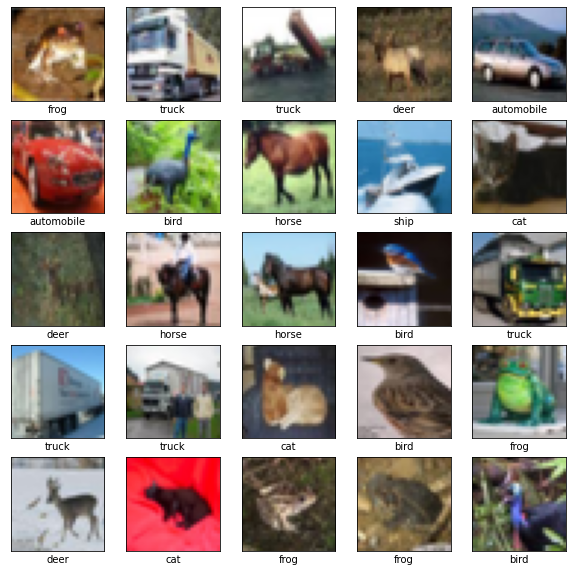

In [4]:
#%% Preview dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
#%% Build model
def define_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
   
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
   
    return model

model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [6]:
#%% Train model
epochs = 10
start = timer()
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=2, 
                    validation_data=(test_images, test_labels))
end = timer()
print('Training time (', epochs, 'epochs):', timedelta(seconds=end-start))

Epoch 1/10
25000/25000 [==============================] - 600s 24ms/step - loss: 1.5549 - accuracy: 0.4336 - val_loss: 1.3455 - val_accuracy: 0.5122
Epoch 2/10
25000/25000 [==============================] - 594s 24ms/step - loss: 1.2459 - accuracy: 0.5586 - val_loss: 1.2456 - val_accuracy: 0.5584
Epoch 3/10
25000/25000 [==============================] - 572s 23ms/step - loss: 1.1470 - accuracy: 0.5936 - val_loss: 1.1659 - val_accuracy: 0.5949
Epoch 4/10
25000/25000 [==============================] - 577s 23ms/step - loss: 1.0892 - accuracy: 0.6213 - val_loss: 1.1876 - val_accuracy: 0.5852
Epoch 5/10
25000/25000 [==============================] - 577s 23ms/step - loss: 1.0387 - accuracy: 0.6387 - val_loss: 1.1778 - val_accuracy: 0.5993
Epoch 6/10
25000/25000 [==============================] - 588s 24ms/step - loss: 1.0024 - accuracy: 0.6533 - val_loss: 1.0797 - val_accuracy: 0.6263
Epoch 7/10
25000/25000 [==============================] - 508s 20ms/step - loss: 0.9756 - accuracy: 0.6628

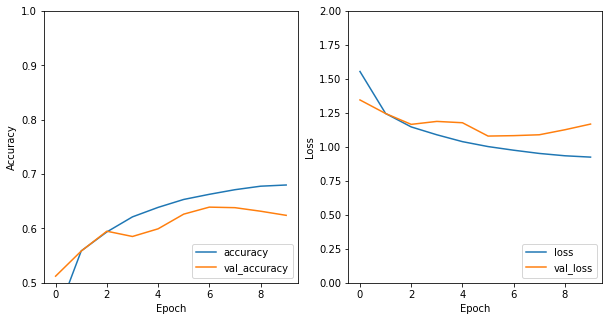

In [7]:
#%% Training results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

In [8]:
#%% Evaluate model using test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 4s - loss: 1.1680 - accuracy: 0.6241
Test accuracy: 0.6241000294685364


In [9]:
#%% Support functions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i][0], img[i]
   
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
 
    plt.imshow(img, cmap=plt.cm.binary) 
    predicted_label = np.argmax(predictions_array)
    color='blue' if (predicted_label == true_label) else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i][0]
    plt.grid(False)
    plt.xticks(np.arange(10),class_names,rotation=90)
    plt.yticks(np.arange(0,1.1,step=0.1))
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [10]:
#%% Predictions 
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
predictions = probability_model.predict(test_images)

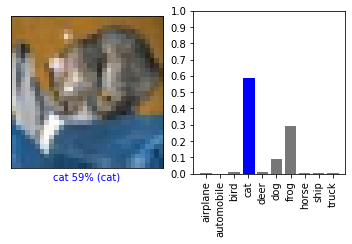

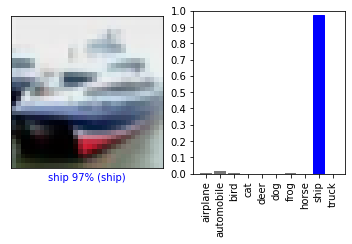

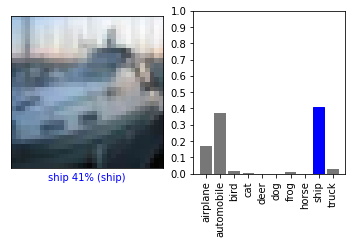

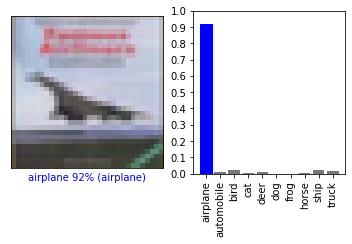

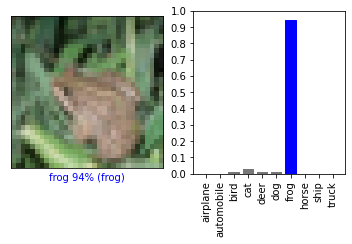

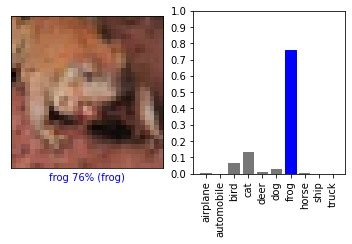

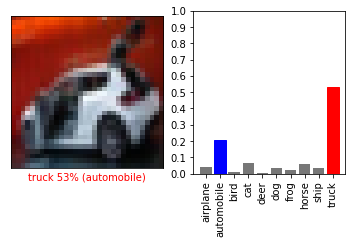

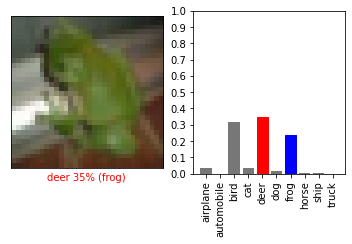

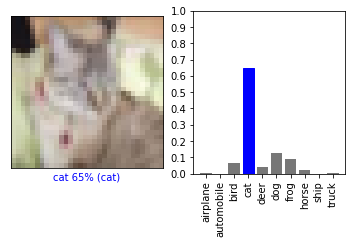

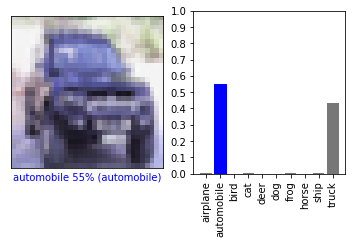

In [11]:
#%% Show some image predictions
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions, test_labels)
    plt.show()

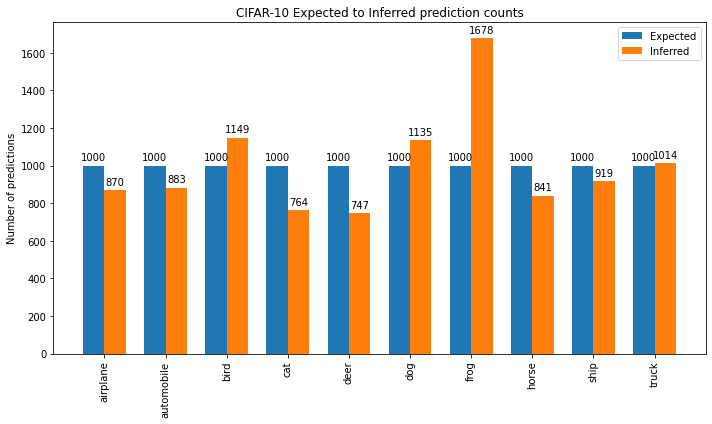

In [12]:
#%% Bar Chart of prediction summary 
predicted_label_list = [np.argmax(predictions[i]) for i in range(len(predictions))]
unique_pred, counts_pred = np.unique(predicted_label_list, return_counts=True)
unique_act, counts_act = np.unique(test_labels, return_counts=True)

x = np.arange(len(unique_act))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1,1,figsize=(10,6))
rects1 = ax.bar(x - width/2, counts_act, width, label='Expected')
rects2 = ax.bar(x + width/2, counts_pred, width, label='Inferred')

ax.set_ylabel('Number of predictions')
ax.set_title('CIFAR-10 Expected to Inferred prediction counts')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=90)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [13]:
#%% Save model
model.save('model.hdf5')

In [14]:
#%% Load model
prod_model = tf.keras.models.load_model('model.hdf5')
prod_model.summary()
probability_prod_model = tf.keras.Sequential([
  prod_model,
  tf.keras.layers.Softmax()
])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

Inference time ( 10000 images ): 0:00:04.616422
Inference time per image: 0:00:00.000462


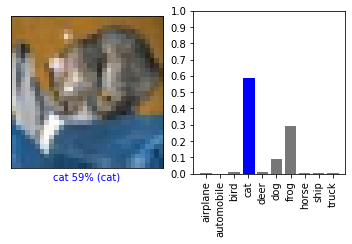

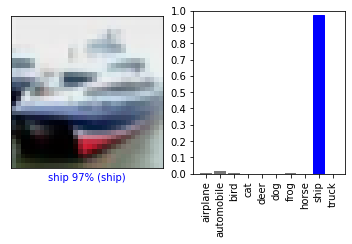

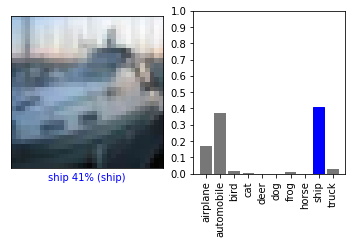

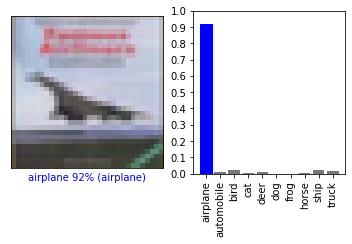

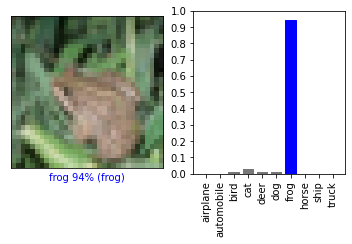

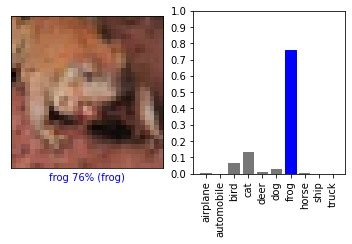

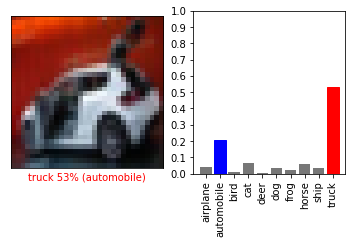

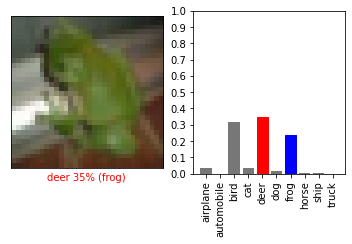

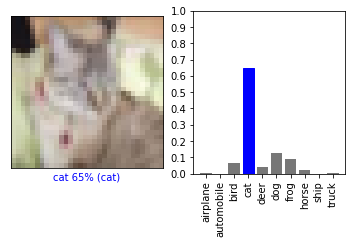

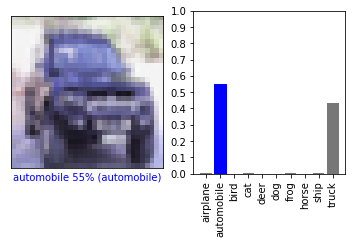

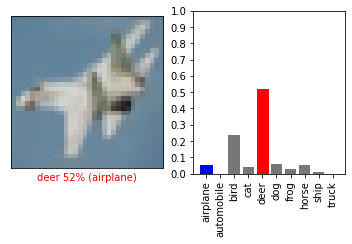

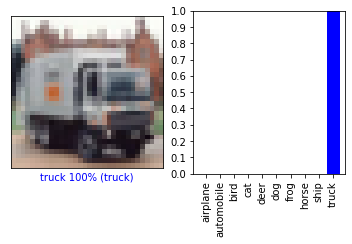

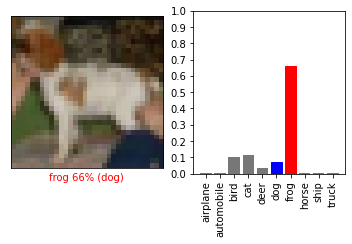

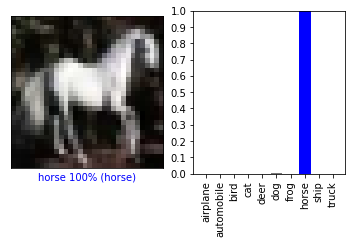

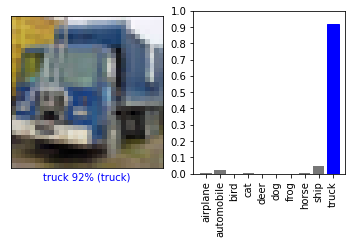

In [15]:
#%% Predict test images using production model
start = timer()
predictions = probability_prod_model.predict(test_images)
end = timer()

num_images = test_images.shape[0]
print('Inference time (', num_images, 'images ):', timedelta(seconds=end-start))
print('Inference time per image:', timedelta(seconds=(end-start)/num_images))

for i in range(0,15):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions, test_labels)
    plt.show()

[Text(0.5, 1.0, 'Confusion Matrix Heatmap'),
 Text(0.5, 33.0, 'Predicted'),
 Text(69.0, 0.5, 'Actual')]

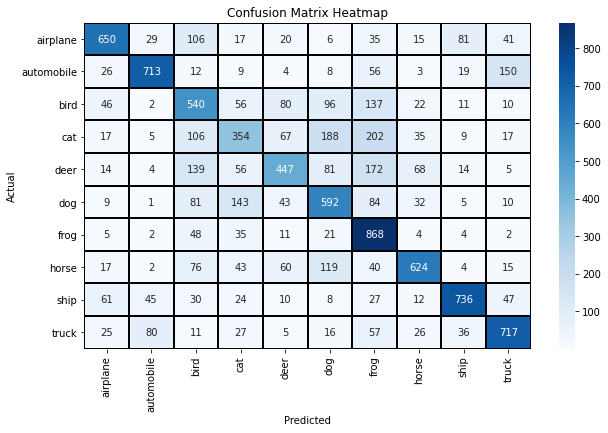

In [16]:
#%% Confusion Matrix
predicted_label_array = np.array([np.argmax(predictions[i]) for i in range(len(predictions))])
test_label_array = test_labels.flatten()
cf_matrix = np.zeros((len(class_names),len(class_names)), dtype=int)
for i in range(len(test_label_array)):
    cf_matrix[test_label_array[i]][predicted_label_array[i]] += 1

plt.figure(figsize=(10,6))
ax = sns.heatmap(cf_matrix, annot=True, 
                 yticklabels=class_names, xticklabels=class_names, fmt='', 
                 linewidths=1, linecolor='k', cmap='Blues')
ax.set(title="Confusion Matrix Heatmap", xlabel="Predicted", ylabel="Actual",)